20MCS1008
ANN MARIYA XAVIER

In [1]:
install.packages('Boruta')

also installing the dependency 'ranger'



package 'ranger' successfully unpacked and MD5 sums checked
package 'Boruta' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AKHIL\AppData\Local\Temp\RtmpUfGY9w\downloaded_packages


In [2]:
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

In [3]:
install.packages('mlbench')

package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AKHIL\AppData\Local\Temp\RtmpUfGY9w\downloaded_packages


In [4]:
library(mlbench)

Warning message:
"package 'mlbench' was built under R version 3.6.3"

In [5]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [6]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [7]:
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [8]:
set.seed(111)
res <- Boruta(Species~.,data=iris,doTrace = 2)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
After 9 iterations, +0.32 secs: 
 confirmed 4 attributes: Petal.Length, Petal.Width, Sepal.Length, Sepal.Width;
 no more attributes left.



In [9]:
res

Boruta performed 9 iterations in 0.3246741 secs.
 4 attributes confirmed important: Petal.Length, Petal.Width,
Sepal.Length, Sepal.Width;
 No attributes deemed unimportant.

In [10]:
res <- Boruta(Species~.,data = iris,doTrace = 2,maxRuns = 100)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
After 9 iterations, +0.28 secs: 
 confirmed 4 attributes: Petal.Length, Petal.Width, Sepal.Length, Sepal.Width;
 no more attributes left.



In [11]:
print(res)

Boruta performed 9 iterations in 0.290976 secs.
 4 attributes confirmed important: Petal.Length, Petal.Width,
Sepal.Length, Sepal.Width;
 No attributes deemed unimportant.


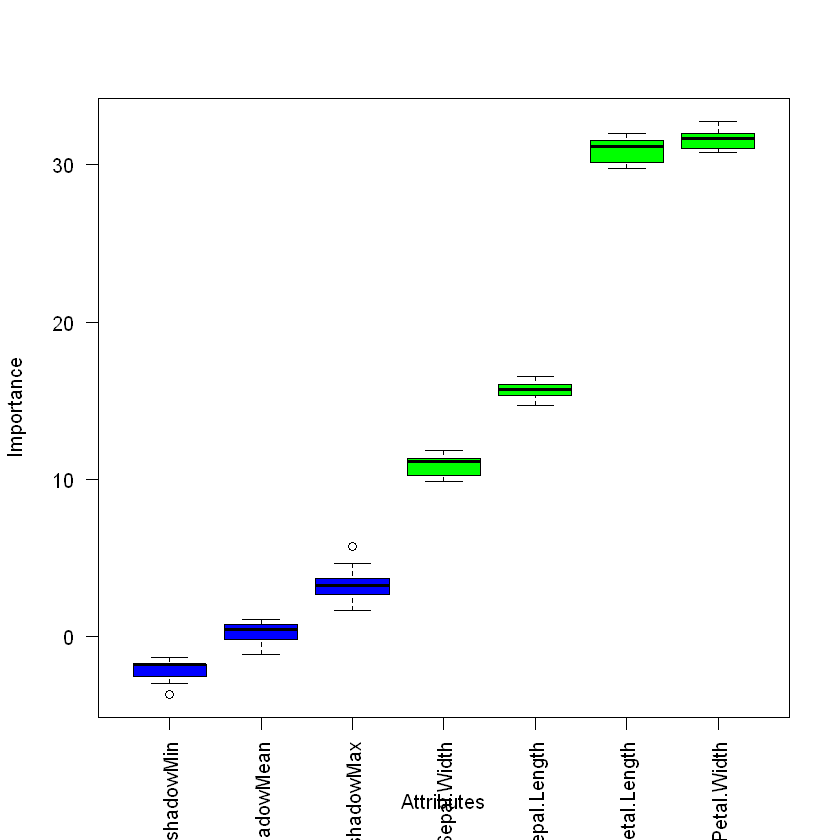

In [12]:
plot(res,las=2)

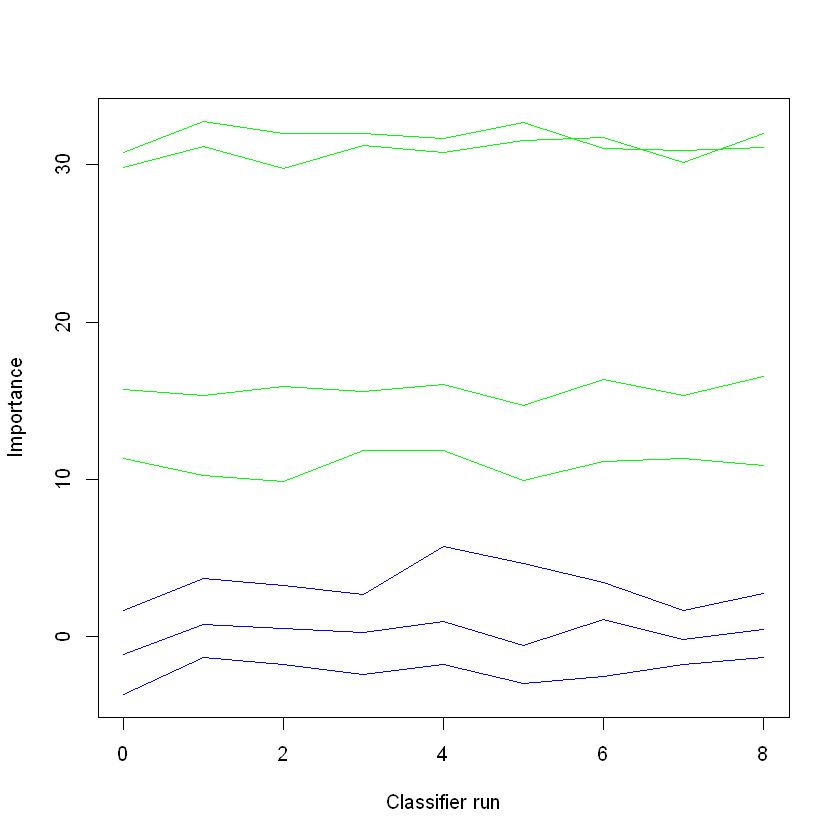

In [13]:
plotImpHistory(res)

In [14]:
attStats(res)

,meanImp,medianImp,minImp,maxImp,normHits,decision
Sepal.Length,15.73912,15.73782,14.733713,16.52755,1,Confirmed
Sepal.Width,10.94925,11.15349,9.906585,11.84923,1,Confirmed
Petal.Length,30.91112,31.16595,29.746683,31.97131,1,Confirmed
Petal.Width,31.64935,31.65172,30.752000,32.76085,1,Confirmed


In [15]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [16]:
res_tent <- TentativeRoughFix(res)
res_tent

Warning message in TentativeRoughFix(res):
"There are no Tentative attributes! Returning original object."

Boruta performed 9 iterations in 0.290976 secs.
 4 attributes confirmed important: Petal.Length, Petal.Width,
Sepal.Length, Sepal.Width;
 No attributes deemed unimportant.

In [17]:
set.seed(222)
sda <- sample(2,nrow(iris),replace = TRUE, prob = c(0.6,0.4))
train <- iris[sda==1,]
test <- iris[sda==2,]

In [18]:
set.seed(333)

In [22]:
rf_all <- randomForest(Species~.,data = train)
rf_all


Call:
 randomForest(formula = Species ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.71%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         28          0         0  0.00000000
versicolor      0         27         2  0.06896552
virginica       0          2        26  0.07142857

In [24]:
getNonRejectedFormula(res)

Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width
<environment: 0x000000006437e6e8>

In [25]:
rf_conf_tent <- randomForest(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width ,data=train)
rf_conf_tent


Call:
 randomForest(formula = Species ~ Sepal.Length + Sepal.Width +      Petal.Length + Petal.Width, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.71%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         28          0         0  0.00000000
versicolor      0         27         2  0.06896552
virginica       0          2        26  0.07142857

In [23]:
install.packages('e1071')

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LENOVO\AppData\Local\Temp\RtmpADcxXx\downloaded_packages


In [24]:
p <- predict(rf_conf_tent,test)
confusionMatrix(p,test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         22          0         0
  versicolor      0         20         3
  virginica       0          1        19

Overall Statistics
                                         
               Accuracy : 0.9385         
                 95% CI : (0.8499, 0.983)
    No Information Rate : 0.3385         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9077         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9524           0.8636
Specificity                 1.0000            0.9318           0.9767
Pos Pred Value              1.0000            0.8696           0.9500
Neg Pred Value              1.0000            0.9762           0.9333
Prevalence

In [25]:
getConfirmedFormula(res)

Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width
<environment: 0x000000000c97c4c0>

In [26]:
set.seed(333)
rf_conf <- randomForest(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,data=train)
rf_conf


Call:
 randomForest(formula = Species ~ Sepal.Length + Sepal.Width +      Petal.Length + Petal.Width, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.71%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         28          0         0  0.00000000
versicolor      0         27         2  0.06896552
virginica       0          2        26  0.07142857

In [27]:
p <- predict(rf_conf,test)
confusionMatrix(p,test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         22          0         0
  versicolor      0         20         3
  virginica       0          1        19

Overall Statistics
                                         
               Accuracy : 0.9385         
                 95% CI : (0.8499, 0.983)
    No Information Rate : 0.3385         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9077         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9524           0.8636
Specificity                 1.0000            0.9318           0.9767
Pos Pred Value              1.0000            0.8696           0.9500
Neg Pred Value              1.0000            0.9762           0.9333
Prevalence